In [1]:
from importlib.metadata import version

import matplotlib
import tiktoken
import torch

print("matplotlib version:", version("matplotlib"))
print("torch version:", version("torch"))
print("tiktoken version:", version("tiktoken"))

c:\Users\riswa\anaconda3\envs\Xray\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


matplotlib version: 3.7.5
torch version: 1.13.1
tiktoken version: 0.7.0


In [2]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [2]:
import torch
import torch.nn as nn


class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x
    

In [4]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

batch = []

txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [5]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)

logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.9289,  0.2748, -0.7557,  ..., -1.6070,  0.2702, -0.5888],
         [-0.4476,  0.1726,  0.5354,  ..., -0.3932,  1.5285,  0.8557],
         [ 0.5680,  1.6053, -0.2155,  ...,  1.1624,  0.1380,  0.7425],
         [ 0.0447,  2.4787, -0.8843,  ...,  1.3219, -0.0864, -0.5856]],

        [[-1.5474, -0.0542, -1.0571,  ..., -1.8061, -0.4494, -0.6747],
         [-0.8422,  0.8243, -0.1098,  ..., -0.1434,  0.2079,  1.2046],
         [ 0.1355,  1.1858, -0.1453,  ...,  0.0869, -0.1590,  0.1552],
         [ 0.1666, -0.8138,  0.2307,  ...,  2.5035, -0.3055, -0.3083]]],
       grad_fn=<UnsafeViewBackward0>)


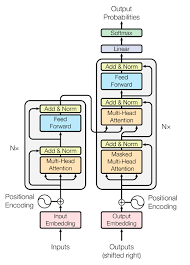

## layer nom 


In [1]:
import torch
import torch.nn as nn

# Define a simple LayerNorm class
class LayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5, elementwise_affine=True):
        """
        normalized_shape: The shape of the input features (number of dimensions).
        eps: A small constant for numerical stability (default=1e-5).
        elementwise_affine: If True, the module has learnable gain (γ) and bias (β) parameters.
        """
        super(LayerNorm, self).__init__()
        self.eps = eps
        self.elementwise_affine = elementwise_affine
        
        # If elementwise_affine is True, we initialize learnable γ and β.
        if self.elementwise_affine:
            self.gamma = nn.Parameter(torch.ones(normalized_shape))  # Scaling factor γ
            self.beta = nn.Parameter(torch.zeros(normalized_shape))  # Shifting factor β
        else:
            self.gamma = None
            self.beta = None

    def forward(self, x):
        # Compute the mean and standard deviation along the last dimension (feature dimension)
        mean = x.mean(dim=-1, keepdim=True)
        std = x.std(dim=-1, keepdim=True)
        
        # Normalize the input (x - mean) / (std + eps)
        x_normalized = (x - mean) / (std + self.eps)
        
        # Apply scaling (γ) and shifting (β) if elementwise_affine is True
        if self.elementwise_affine:
            return self.gamma * x_normalized + self.beta
        else:
            return x_normalized

# Example usage
x = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])  # A simple batch of inputs
layer_norm = LayerNorm(normalized_shape=x.shape[-1])

# Apply layer normalization
output = layer_norm(x)
print("Normalized output:\n", output)


c:\Users\riswa\anaconda3\envs\Xray\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Normalized output:
 tensor([[-1.0000,  0.0000,  1.0000],
        [-1.0000,  0.0000,  1.0000]], grad_fn=<AddBackward0>)


In [5]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A
layer = nn.Sequential(nn.Linear(5, 6), nn.Tanh())
out = layer(batch_example)
print(out)

tensor([[ 0.2222,  0.3337, -0.4404,  0.2180, -0.1214, -0.7038],
        [ 0.2101,  0.2349, -0.1490,  0.4776,  0.3183, -0.2900]],
       grad_fn=<TanhBackward0>)


In [11]:
ln = LayerNorm(5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[-4.1723e-08],
        [ 0.0000e+00]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.8000],
        [0.8000]], grad_fn=<VarBackward0>)


In [8]:
batch_example.shape

torch.Size([2, 5])

In [12]:
out_ln

tensor([[ 0.4945,  0.9564, -0.0200,  0.2375, -1.6685],
        [ 0.8127, -1.2313, -0.8554,  1.0110,  0.2630]], grad_fn=<AddBackward0>)

In [13]:
import torch

# Example configuration
batch_size = 2  # 2 sentences
seq_len = 5     # Each sentence has 5 tokens
emb_dim = 4     # Embedding dimension is 4 (i.e., 4 features per token)

# Random token embeddings (this could be from an embedding layer or transformer layer)
batch_example = torch.randn(batch_size, seq_len, emb_dim)

# Layer normalization (normalizing along the last dimension: embedding dimension)
ln = LayerNorm(emb_dim)
out_ln = ln(batch_example)

# Compute mean and variance after LayerNorm
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)

# Print the results
print("Layer Normalized Output:\n", out_ln)
print("Mean after LayerNorm:\n", mean)
print("Variance after LayerNorm:\n", var)


Layer Normalized Output:
 tensor([[[ 0.8063, -1.4210,  0.0414,  0.5733],
         [ 1.4255, -0.9151, -0.2441, -0.2662],
         [ 0.5886, -1.2367,  1.0001, -0.3520],
         [ 0.7547, -1.4456,  0.5712,  0.1196],
         [ 1.1633,  0.4948, -0.9457, -0.7123]],

        [[-0.4143, -0.8040, -0.2394,  1.4576],
         [-0.7121, -0.1042, -0.6283,  1.4447],
         [-0.1990, -1.0653,  1.3484, -0.0841],
         [ 1.0985,  0.5912, -0.9352, -0.7545],
         [-1.2260,  0.4919, -0.3349,  1.0690]]], grad_fn=<AddBackward0>)
Mean after LayerNorm:
 tensor([[[ 0.0000e+00],
         [ 3.7253e-08],
         [ 1.4901e-08],
         [ 3.5390e-08],
         [-2.9802e-08]],

        [[-2.9802e-08],
         [-5.9605e-08],
         [-1.3039e-08],
         [-4.4703e-08],
         [ 0.0000e+00]]], grad_fn=<MeanBackward1>)
Variance after LayerNorm:
 tensor([[[0.7500],
         [0.7500],
         [0.7500],
         [0.7500],
         [0.7500]],

        [[0.7500],
         [0.7500],
         [0.7500],
   

In [15]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
torch.sqrt(torch.tensor(2.0 / torch.pi)) *
(x + 0.044715 * torch.pow(x, 3))
))


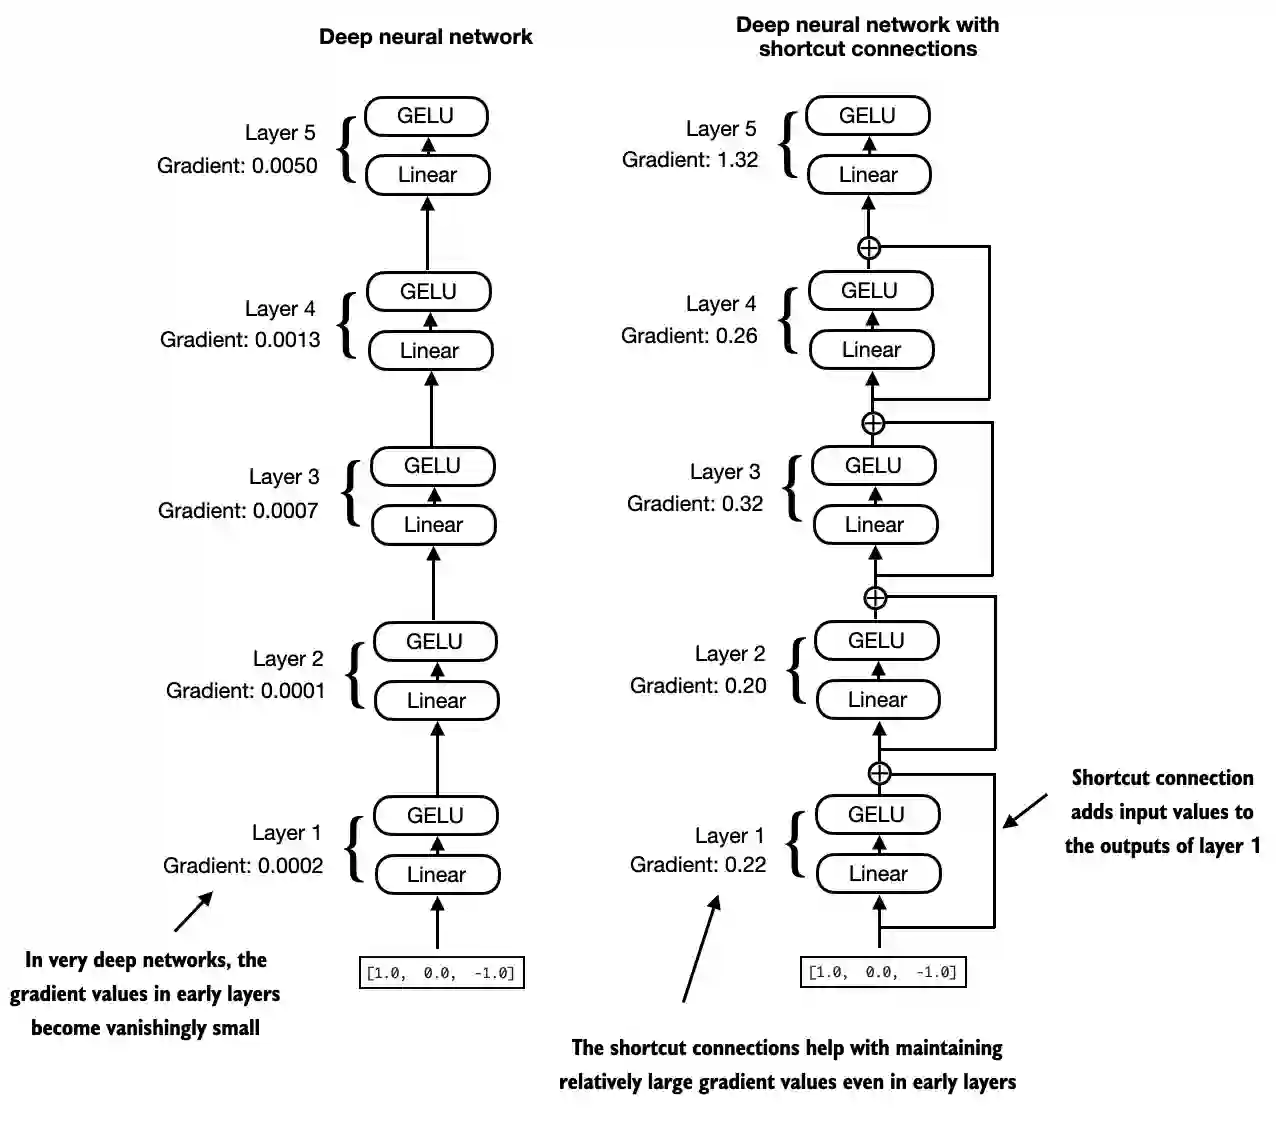

## short Connetions

In [26]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])

    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut :#and x.shape == layer_output.shape:
                x = x + layer_output
            else:
                x = layer_output
        return x


def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)
    
    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

            

In [29]:
layer_sizes = [3, 3, 3, 3, 3, 1]  

sample_input = torch.tensor([[1., 0.,9]])

torch.manual_seed(123)
model_without_shortcut = DeepNeuralNetwork(
    layer_sizes, use_shortcut=False
)
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.0004272009537089616
layers.1.0.weight has gradient mean of 0.0005589048378169537
layers.2.0.weight has gradient mean of 0.0017920176032930613
layers.3.0.weight has gradient mean of 0.0007656484958715737
layers.4.0.weight has gradient mean of 0.0018877488328143954


In [30]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )
    def forward(self, x):
        return self.layers(x)

In [ ]:
from previous_chapters import MultiHeadAttention

# Create a dummy input tensor

class Transformerblock(nn.Module):
    def __init__(self,cfg):
        super().__init__()
        self.att =MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"], 
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.dropout = nn.Dropout(cfg["drop_rate"])

    def forward(self,x):
        shortcut = x
        x = self.norm1(x)
        x= self.norm2(x)
        